# AI Community @ Семинар № 8
### Базовое решение второго конкурса

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

%matplotlib inline

Загрузим данные.

In [2]:
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')

Посмотрим на их вид:

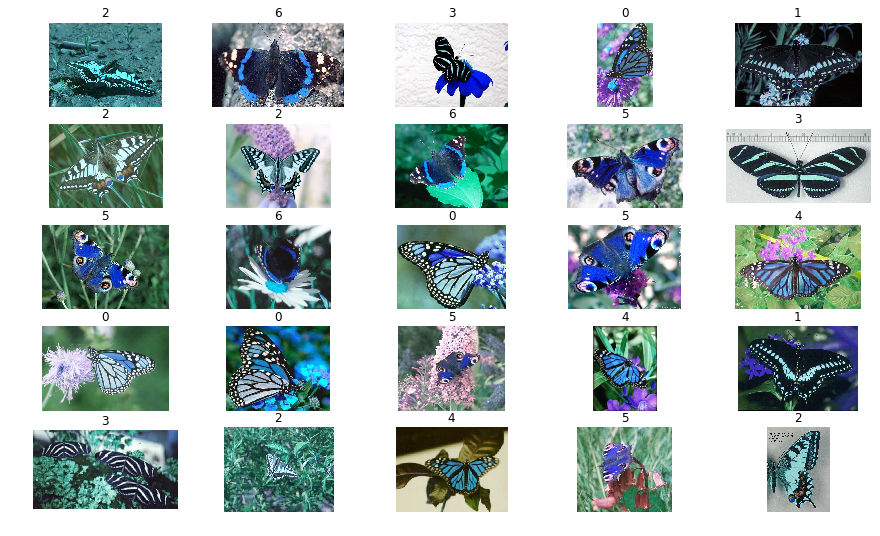

In [3]:
_, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 9))

for i, row in enumerate(axes):
    for j, axis in enumerate(row):
        axes[i][j].axis('off')
        axes[i][j].set_title(y_train[5*i + j])
        axes[i][j].imshow(X_train[5*i + j]);

Данные разного размера. Приведем их все к одному размеру: `256x256`.

In [4]:
X_train = np.vstack([cv2.resize(img, (256, 256)).reshape(-1) for img in X_train])
X_test = np.vstack([cv2.resize(img, (256, 256)).reshape(-1) for img in X_test])

Обучим на выборке случайный лес из 100 деревьев.

In [5]:
clf = RandomForestClassifier(n_estimators=100)

In [6]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Теперь предскажем метки классов для тестовых данных и подготовим файл для отправки.

In [7]:
y_pred = clf.predict(X_test)
pd.DataFrame(data={'category': y_pred}).to_csv('baseline.csv', index_label='Id')